# Lecture_02 회귀
<font size=5><b>(Scikit-learn을 활용한 머신러닝)<b></font>
<div align='right'>발표자: Hoe Sung Ryu ( 류 회 성 ) </div>

   
<table align="center">
<td>
<a target="_blank" href="https://colab.research.google.com/drive/1UHalL5YdENo7gvMiZvcpihS5GTfNlk8E?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a> 
</td>
</table>

    
    
![](https://media.vlpt.us/images/seongguk/post/f33dd79a-d45a-432f-b9f5-0528d6e1e39d/%EC%BA%A1%EC%B2%98.JPG)

    
    
---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#선형-회귀" data-toc-modified-id="선형-회귀-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>선형 회귀</a></span></li><li><span><a href="#실제데이터(보스턴-집값데이터)를-통한-회귀" data-toc-modified-id="실제데이터(보스턴-집값데이터)를-통한-회귀-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>실제데이터(보스턴 집값데이터)를 통한 회귀</a></span></li><li><span><a href="#LightGBM-을-활용한-회귀" data-toc-modified-id="LightGBM-을-활용한-회귀-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LightGBM 을 활용한 회귀</a></span></li></ul></div>

## 선형 회귀 

아래 그림은 근속 연수(독립변수)와 연봉(종속변수) 관계를 나타 낸 것이다. 
왼쪽 표 (근속연수와 연봉의 관계)를 선형 회귀를 사용하여 오른쪽 그림과 같이 나타내고, 6,7년 후에 연봉을 예측 하시오. 


<img src='../img/linear_example.png'>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
# load_data 
X_train = [[1],[2],[3],[4],[5]]
y_train = [2800, 3100, 3750, 4240, 5000]

X_test =[[6],[7]]

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 모델정의 
model.fit(X_train, y_train) # 모델학습 

LinearRegression()

In [4]:
y_pred = model.predict(X_test) # 예측 

In [5]:
y_pred

array([5440., 5994.])

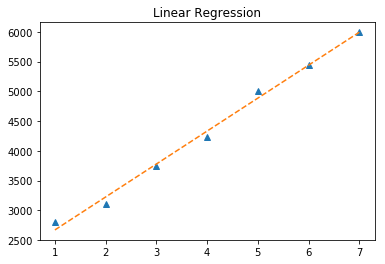

In [6]:
import matplotlib.pyplot as plt 
plt.title('Linear Regression')
# 데이타 분포 
plt.plot(X_train+X_test, y_train+ list(y_pred), '^')

# 예측한 선형 모델 
x = range(1,8)
plt.plot(x, model.coef_*x + model.intercept_, '--' )
plt.show()

## 실제데이터(보스턴 집값데이터)를 통한 회귀

In [9]:
from sklearn.datasets import load_boston
import pandas as pd

# 보스턴 데이터 셋
boston = load_boston()
boston_df = pd.DataFrame(boston.data, 
                         columns=boston.feature_names, 
                         index=range(1,len(boston.data)+1))
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
X = pd.DataFrame(boston_df['RM']) # 2차원 배열로 만들기 위해서 DF로 만듬
X.head()

,RM
1,6.575
2,6.421
3,7.185
4,6.998
5,7.147


In [11]:
y = boston_df['PRICE']
y.head()

1    24.0
2    21.6
3    34.7
4    33.4
5    36.2
Name: PRICE, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=0.3,
                                                       random_state = 42)

In [13]:
from sklearn.linear_model import LinearRegression
model= LinearRegression() # 정의 
model.fit(X_train,y_train) #  학습!!
y_pred = model.predict(X_test) # 예측값 

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.314224104076755

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mse

40.35144969787305

In [16]:
# rmse
np.sqrt(mse)

6.352279094771659

In [17]:
r2 = r2_score(y_test,y_pred)
r2

0.4584649934303068

In [18]:
# 추정된 회귀 모형의 회귀 계수 및 절편 값을 확인
# 회귀 계수는 coef_ 속성, 절편은 intercept_ 속성에 각각 값이 할당
print("회귀 계수 : ", model.coef_)
print("절편 : ",model.intercept_)

회귀 계수 :  [9.1181022]
절편 :  -34.662307438406785


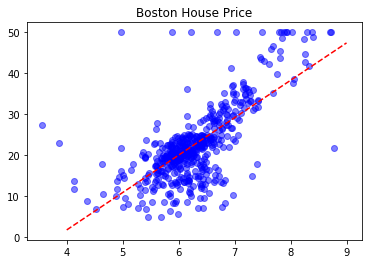

In [19]:
import matplotlib.pyplot as plt
x = range(4,10)
plt.title("Boston House Price")
plt.plot(X,y,'o',color = 'blue',alpha = 0.5)
plt.plot(x,model.coef_*x+model.intercept_,'--',color='red')
plt.show()

## LightGBM 을 활용한 회귀

In [21]:
from lightgbm import LGBMRegressor
lgm= LGBMRegressor() # 정의 
lgm.fit(X_train,y_train) #  학습!!
lgm_y_pred = lgm.predict(X_test) # 예측값 

In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.314224104076755

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
mse

40.35144969787305

In [24]:
# rmse
np.sqrt(mse)

6.352279094771659

In [25]:
r2 = r2_score(y_test,y_pred)
r2

0.4584649934303068

In [26]:
from sklearn.metrics import mean_absolute_error # 1. MAE
from sklearn.metrics import mean_squared_error  # 2. MSE 
import numpy as np                              # 3. RMSE 
from sklearn.metrics import r2_score            # 4. R2_score

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2_score: {r2_score(y_test, y_pred)}')

MAE: 4.314224104076755
MSE: 40.35144969787305
RMSE: 6.352279094771659
R2_score: 0.4584649934303068
